In [77]:
import os
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
from env.utils import load_all_scores, instance_fig
from env.VRPInstance import VRPInstance
from argparse import Namespace
import plotly.graph_objects as go

In [78]:
VRP_KEYS = ['X-n101-k25', 'X-n106-k14', 'X-n110-k13', 'X-n115-k10', 'X-n120-k6', 'X-n125-k30', 'X-n129-k18', 'X-n134-k13', 'X-n139-k10', 'X-n143-k7', 'X-n148-k46', 'X-n153-k22', 'X-n157-k13', 'X-n162-k11', 'X-n167-k10', 'X-n172-k51', 'X-n176-k26', 'X-n181-k23', 'X-n186-k15', 'X-n190-k8', 'X-n195-k51', 'X-n200-k36', 'X-n204-k19', 'X-n209-k16', 'X-n214-k11', 'X-n219-k73', 'X-n223-k34', 'X-n228-k23', 'X-n233-k16', 'X-n237-k14', 'X-n242-k48', 'X-n247-k50', 'X-n251-k28', 'X-n256-k16', 'X-n261-k13', 'X-n266-k58', 'X-n270-k35', 'X-n275-k28', 'X-n280-k17', 'X-n284-k15', 'X-n289-k60', 'X-n294-k50', 'X-n298-k31', 'X-n303-k21', 'X-n308-k13', 'X-n313-k71', 'X-n317-k53', 'X-n322-k28', 'X-n327-k20', 'X-n331-k15', 'X-n336-k84', 'X-n344-k43', 'X-n351-k40', 'X-n359-k29', 'X-n367-k17', 'X-n376-k94', 'X-n384-k52', 'X-n393-k38', 'X-n401-k29', 'X-n411-k19', 'X-n420-k130', 'X-n429-k61', 'X-n439-k37', 'X-n449-k29', 'X-n459-k26', 'X-n469-k138', 'X-n480-k70', 'X-n491-k59', 'X-n502-k39', 'X-n513-k21', 'X-n524-k153', 'X-n536-k96', 'X-n548-k50', 'X-n561-k42', 'X-n573-k30', 'X-n586-k159', 'X-n599-k92', 'X-n613-k62', 'X-n627-k43', 'X-n641-k35', 'X-n655-k131', 'X-n670-k130', 'X-n685-k75', 'X-n701-k44', 'X-n716-k35', 'X-n733-k159', 'X-n749-k98', 'X-n766-k71', 'X-n783-k48', 'X-n801-k40', 'X-n819-k171', 'X-n837-k142', 'X-n856-k95', 'X-n876-k59', 'X-n895-k37', 'X-n916-k207', 'X-n936-k151', 'X-n957-k87', 'X-n979-k58', 'X-n1001-k43']
VRP_KEYS = [f"{name}.vrp" for name in VRP_KEYS]

In [79]:
pd.options.display.float_format = '{:.2f}'.format

In [80]:
print("Initial scores:")
args = Namespace(round_int=True, algo=None, data_folder='dataset/train/data_cvrp')
init_scores = {}
for key in VRP_KEYS:
    instance = VRPInstance.from_path(f"dataset/train/data_cvrp/{key}", args, key)
    init_score = instance.evaluation(instance.init_solution)
    init_scores[key] = float(init_score)
init_scores = pd.Series(init_scores).to_frame(name="Score")
init_scores

Initial scores:


,Score
X-n101-k25.vrp,36136.00
X-n106-k14.vrp,39109.00
X-n110-k13.vrp,23124.00
X-n115-k10.vrp,25546.00
X-n120-k6.vrp,46251.00
...,...
X-n916-k207.vrp,523536.00
X-n936-k151.vrp,264562.00
X-n957-k87.vrp,220326.00
X-n979-k58.vrp,322370.00


In [81]:
def load_score(folder, seeds):
    df = load_all_scores(folder, seeds, VRP_KEYS)
    best_score = df.applymap(lambda x: min(x))
    overall = best_score.apply(lambda x: [min(x), max(x), np.mean(x), np.std(x)])
    overall.index = ["Min", "Max", "Mean", "Std."]
    return df, best_score, overall.T

In [82]:
print("IRL_HGS1 scores:")
irl_hgs_1_df, irl_hgs_1_best_score, irl_hgs_1_overall = load_score("logs/dataset_train_data_cvrp_HGS_0.0", range(1, 4))
irl_hgs_1_overall

IRL_HGS1 scores:


,Min,Max,Mean,Std.
X-n101-k25.vrp,27591.00,27591.00,27591.00,0.00
X-n106-k14.vrp,26397.00,26416.00,26404.00,8.52
X-n110-k13.vrp,14971.00,14971.00,14971.00,0.00
X-n115-k10.vrp,12747.00,12747.00,12747.00,0.00
X-n120-k6.vrp,13332.00,13332.00,13332.00,0.00
...,...,...,...,...
X-n916-k207.vrp,331754.00,331949.00,331834.00,83.37
X-n936-k151.vrp,133279.00,133463.00,133379.00,75.96
X-n957-k87.vrp,85605.00,85760.00,85701.00,68.47
X-n979-k58.vrp,119927.00,120660.00,120305.33,299.71


In [83]:
print("IRL_HGS2 scores:")
irl_hgs_2_df, irl_hgs_2_best_score, irl_hgs_2_overall = load_score("logs/dataset_train_data_cvrp_HGS_0.1", range(1, 4))
irl_hgs_2_overall

IRL_HGS2 scores:


,Min,Max,Mean,Std.
X-n101-k25.vrp,27591.00,27591.00,27591.00,0.00
X-n106-k14.vrp,26375.00,26391.00,26384.67,6.94
X-n110-k13.vrp,14971.00,14971.00,14971.00,0.00
X-n115-k10.vrp,12747.00,12747.00,12747.00,0.00
X-n120-k6.vrp,13332.00,13332.00,13332.00,0.00
...,...,...,...,...
X-n916-k207.vrp,331691.00,332213.00,331936.00,214.30
X-n936-k151.vrp,133113.00,133476.00,133289.00,148.40
X-n957-k87.vrp,85757.00,85898.00,85840.00,60.22
X-n979-k58.vrp,119697.00,120620.00,120190.00,379.44


In [84]:
print("IRL_VNS1 scores:")
irl_vns_1_df, irl_vns_1_best_score, irl_vns_1_overall = load_score("logs/dataset_train_data_cvrp_VNS_0.0", range(1, 4))
irl_vns_1_overall

IRL_VNS1 scores:


,Min,Max,Mean,Std.
X-n101-k25.vrp,27858.00,28058.00,27984.00,89.55
X-n106-k14.vrp,26419.00,26540.00,26474.67,49.87
X-n110-k13.vrp,14985.00,15180.00,15058.67,86.45
X-n115-k10.vrp,12816.00,12823.00,12818.33,3.30
X-n120-k6.vrp,13429.00,13473.00,13448.00,18.46
...,...,...,...,...
X-n916-k207.vrp,335394.00,335558.00,335459.67,70.83
X-n936-k151.vrp,139309.00,139613.00,139431.33,131.01
X-n957-k87.vrp,87295.00,87519.00,87402.67,91.65
X-n979-k58.vrp,123360.00,124097.00,123616.67,339.91


In [85]:
print("IRL_VNS2 scores:")
irl_vns_2_df, irl_vns_2_best_score, irl_vns_2_overall = load_score("logs/dataset_train_data_cvrp_VNS_0.1", range(1, 4))
irl_vns_2_overall

IRL_VNS2 scores:


,Min,Max,Mean,Std.
X-n101-k25.vrp,28027.00,28080.00,28053.33,21.64
X-n106-k14.vrp,26583.00,26665.00,26630.67,34.78
X-n110-k13.vrp,15121.00,15369.00,15207.00,114.62
X-n115-k10.vrp,12823.00,12882.00,12846.00,25.78
X-n120-k6.vrp,13418.00,13624.00,13495.67,91.41
...,...,...,...,...
X-n916-k207.vrp,333588.00,334232.00,333922.33,263.49
X-n936-k151.vrp,137563.00,139495.00,138644.33,805.42
X-n957-k87.vrp,86765.00,87094.00,86943.00,135.66
X-n979-k58.vrp,122935.00,123706.00,123384.67,327.58


In [86]:
irl_hgs_1_running_time = irl_hgs_1_df.index.get_level_values("Running Time")[-1]/3600
irl_hgs_2_running_time = irl_hgs_2_df.index.get_level_values("Running Time")[-1]/3600
irl_vns_1_running_time = irl_vns_1_df.index.get_level_values("Running Time")[-1]/3600
irl_vns_2_running_time = irl_vns_2_df.index.get_level_values("Running Time")[-1]/3600

print(f"IRL_HGS1 running time = {irl_hgs_1_running_time:.2f}h")
print(f"IRL_HGS2 running time = {irl_hgs_2_running_time:.2f}h")
print(f"IRL_VNS1 running time = {irl_vns_1_running_time:.2f}h")
print(f"IRL_VNS2 running time = {irl_vns_2_running_time:.2f}h")

IRL_HGS1 running time = 6.71h
IRL_HGS2 running time = 11.55h
IRL_VNS1 running time = 11.86h
IRL_VNS2 running time = 13.59h


In [87]:
def show_init_graphs(keys):
    n = len(keys)
    width = 180*n
    fig = make_subplots(rows=1, cols=n, horizontal_spacing=0.01)
    os.makedirs(f"graphs/dataset_train_data_cvrp_init", exist_ok=True)
    for i, key in enumerate(keys):
        instance = VRPInstance.from_path(f"dataset/train/data_cvrp/{key}", args, key)
        instance.solution = instance.init_solution
        plotly_fig, score = instance.plot(), instance.evaluation(instance.solution)
        plotly_fig.write_image(f"graphs/dataset_train_data_cvrp_init/{key}.pdf")
        title = key.split(".")[0] + f" - {score:.0f}"
        fig.add_traces(plotly_fig.data, rows=i//n+1, cols=i%n+1)
        fig['layout'][f'xaxis{i+1}'].update(title=title)
    fig.update_layout(height=200, width=width)
    fig.update_traces(line_width=1, marker_size=4)
    fig.update_layout(template='plotly_white', margin=dict(l=4, r=4, t=4, b=4, pad=4, autoexpand=True))
    fig.update_xaxes(showgrid=False, showticklabels=False, showline=False, zeroline=False)
    fig.update_yaxes(visible=False)
    fig.update_layout(showlegend=False)
    fig.show("svg")

In [88]:
def show_graphs(algo, lamb, best_scores, keys):
    n = len(keys)
    width = 180*n
    fig = make_subplots(rows=1, cols=n, horizontal_spacing=0.01)
    os.makedirs(f"graphs/dataset_train_data_cvrp_{algo}_{lamb}", exist_ok=True)
    for i, key in enumerate(keys):
        plotly_fig, score = instance_fig(best_scores, key, "dataset/train/data_cvrp")
        plotly_fig.write_image(f"graphs/dataset_train_data_cvrp_{algo}_{lamb}/{key}.pdf")
        title = key.split(".")[0] + f" - {score:.0f}"
        fig.add_traces(plotly_fig.data, rows=i//n+1, cols=i%n+1)
        fig['layout'][f'xaxis{i+1}'].update(title=title)
    fig.update_layout(height=200, width=width)
    fig.update_traces(line_width=1, marker_size=4)
    fig.update_layout(template='plotly_white', margin=dict(l=4, r=4, t=4, b=4, pad=4, autoexpand=True))
    fig.update_xaxes(showgrid=False, showticklabels=False, showline=False, zeroline=False)
    fig.update_yaxes(visible=False)
    fig.update_layout(showlegend=False)
    fig.show("svg")

First 10 instances:
ClockHand


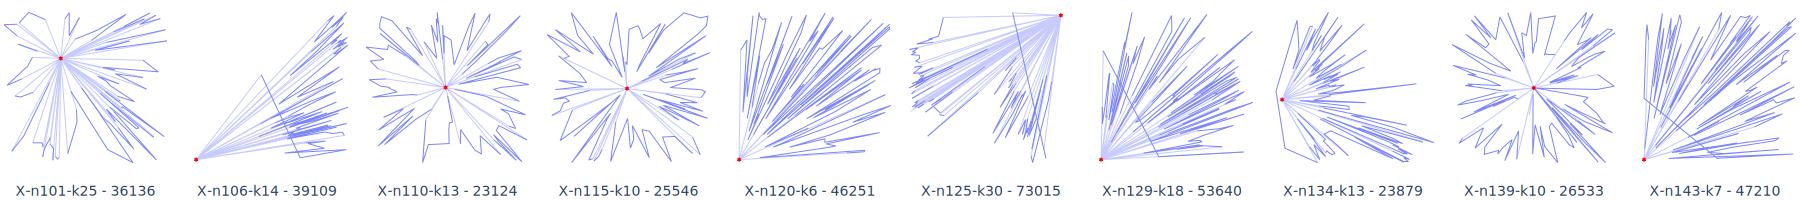

IRL_HGS1


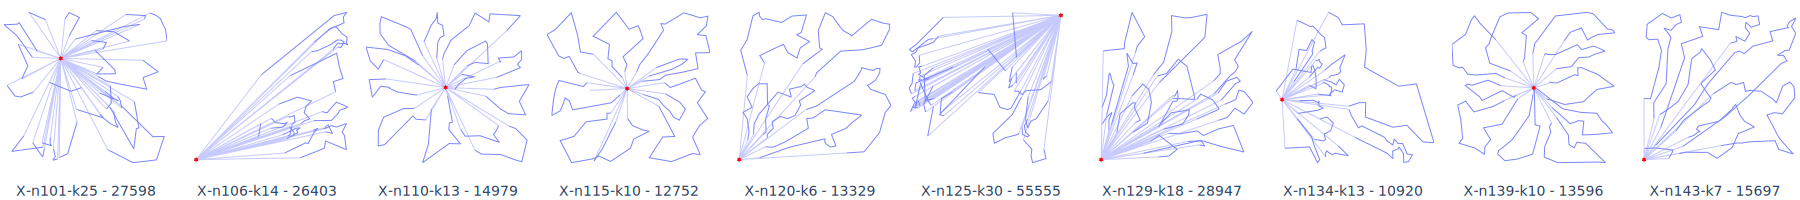

IRL_HGS2


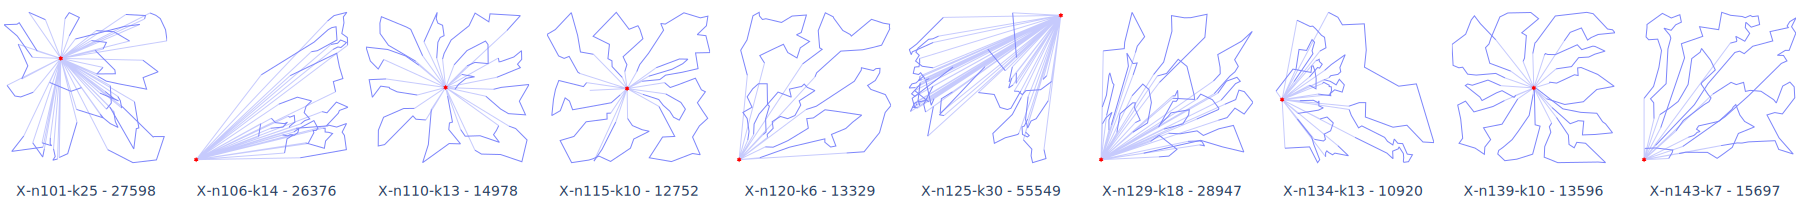

IRL_VNS1


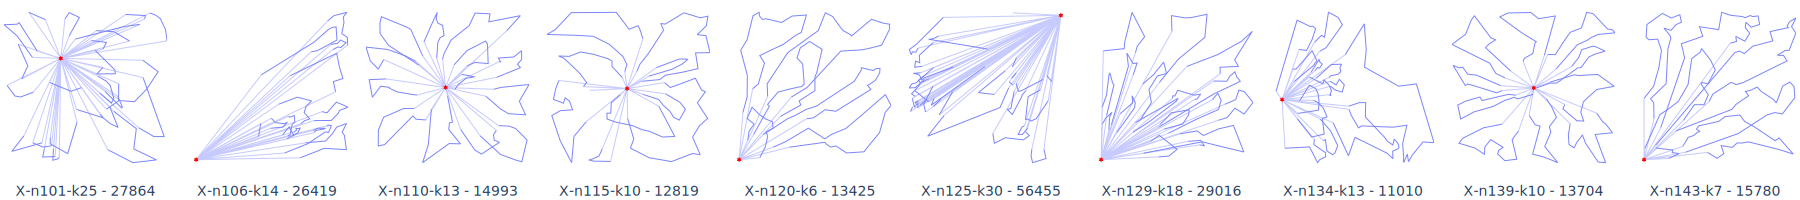

IRL_VNS2


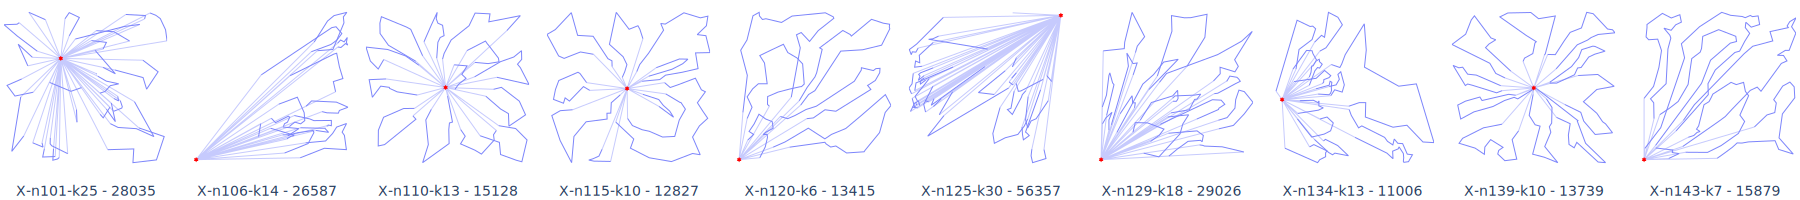

In [89]:
print("First 10 instances:")
print("ClockHand")
show_init_graphs(VRP_KEYS[:10])
print("IRL_HGS1")
show_graphs("HGS", 0.0, irl_hgs_1_best_score, VRP_KEYS[:10])
print("IRL_HGS2")
show_graphs("HGS", 0.1, irl_hgs_2_best_score, VRP_KEYS[:10])
print("IRL_VNS1")
show_graphs("VNS", 0.0, irl_vns_1_best_score, VRP_KEYS[:10])
print("IRL_VNS2")
show_graphs("VNS", 0.1, irl_vns_2_best_score, VRP_KEYS[:10])

Last 10 instances:
ClockHand


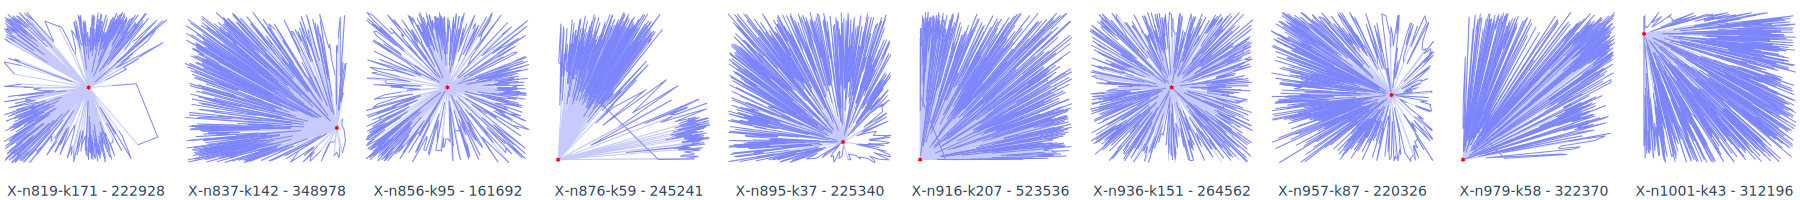

IRL_HGS1


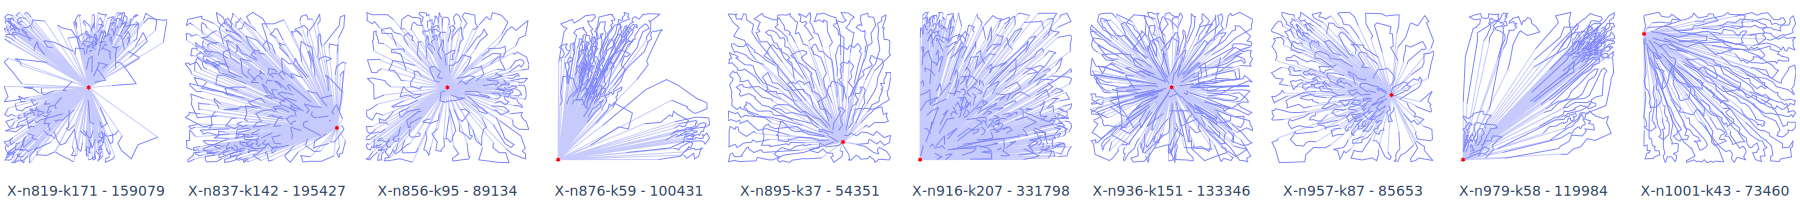

IRL_HGS2


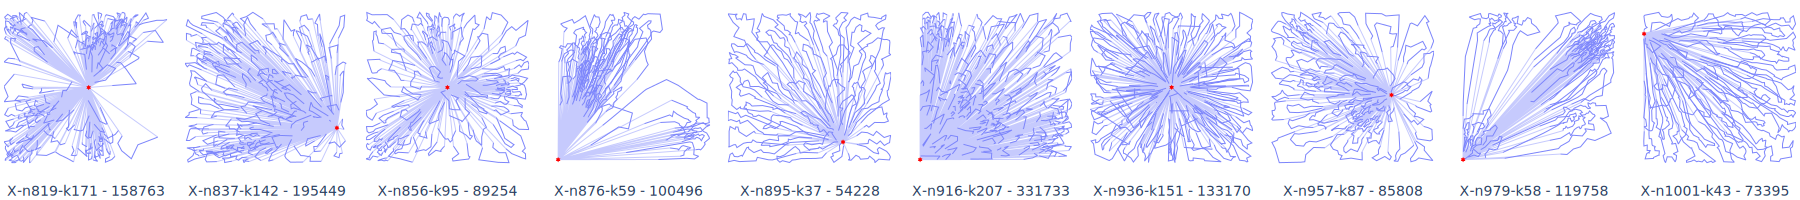

IRL_VNS1


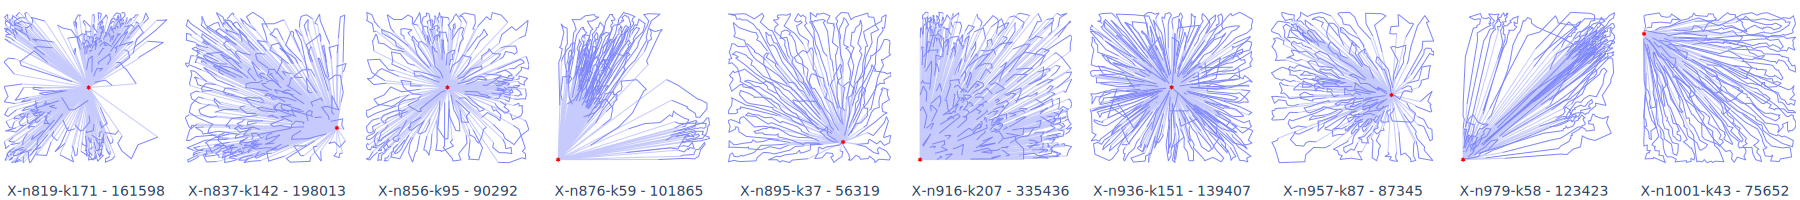

IRL_VNS2


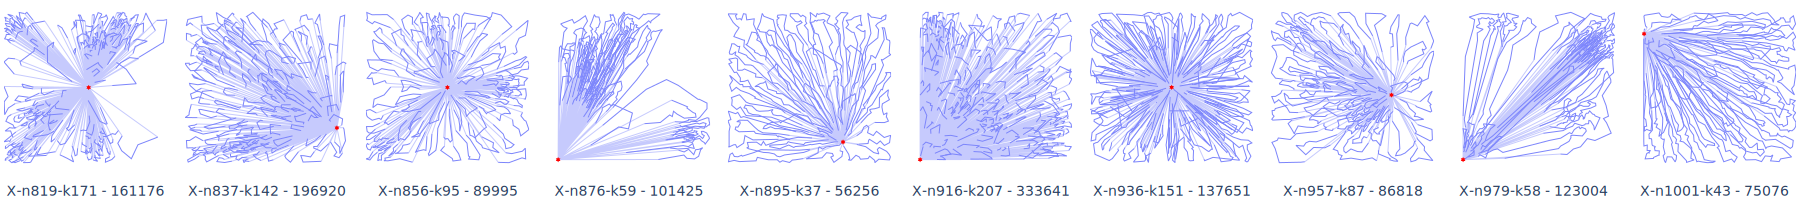

In [90]:
print("Last 10 instances:")
print("ClockHand")
show_init_graphs(VRP_KEYS[-10:])
print("IRL_HGS1")
show_graphs("HGS", 0.0, irl_hgs_1_best_score, VRP_KEYS[-10:])
print("IRL_HGS2")
show_graphs("HGS", 0.1, irl_hgs_2_best_score, VRP_KEYS[-10:])
print("IRL_VNS1")
show_graphs("VNS", 0.0, irl_vns_1_best_score, VRP_KEYS[-10:])
print("IRL_VNS2")
show_graphs("VNS", 0.1, irl_vns_2_best_score, VRP_KEYS[-10:])

In [91]:
def create_scatter(data, name, line_color, showlegend):
    data = data.to_numpy().min(-1)
    best_data = []
    for x in data:
        best_data.append(x)
        best_data[-1] = min(best_data)
    data = best_data
    scatter = go.Scatter(x=np.arange(len(data))/len(data), y=data, mode='lines', legendgroup=name, name=name, line_width=2, line_color=line_color, showlegend=showlegend)
    return scatter

Last 10 instances:


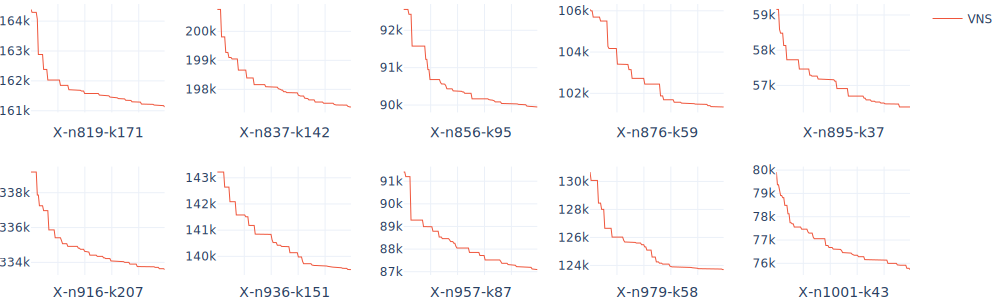

In [94]:
print("Last 10 instances:")
keys = VRP_KEYS[-10:]
n = 5
fig = make_subplots(rows=2, cols=n, horizontal_spacing=0.06, vertical_spacing=0.2)
for i, key in enumerate(keys):
    vns = create_scatter(irl_vns_2_df[key], 'VNS', "#EF553B", i==0)
    fig.append_trace(vns, row=i//n+1, col=i%n+1)
    fig['layout'][f'xaxis{i+1}'].update(title=key.split(".vrp")[0])
fig.update_layout(height=300, width=100*len(keys))
fig.update_traces(line_width=1, marker_size=2)
fig.update_layout(template='plotly_white', margin=dict(l=0, r=0, t=0, b=0, pad=0, autoexpand=True))
fig.update_xaxes(showgrid=True, showticklabels=False, showline=False, zeroline=False)
fig.show("svg")

Last 10 instances:


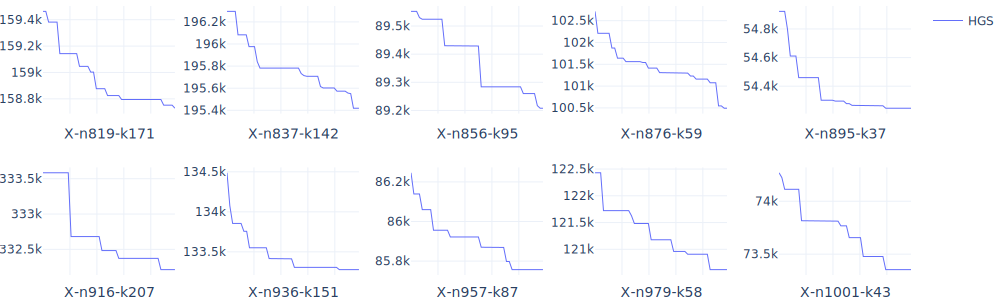

In [95]:
print("Last 10 instances:")
keys = VRP_KEYS[-10:]
n = 5
fig = make_subplots(rows=2, cols=n, horizontal_spacing=0.06, vertical_spacing=0.2)
for i, key in enumerate(keys):
    hgs = create_scatter(irl_hgs_2_df[key], 'HGS', "#636EFA", i==0)
    fig.append_trace(hgs, row=i//n+1, col=i%n+1)
    fig['layout'][f'xaxis{i+1}'].update(title=key.split(".vrp")[0])
fig.update_layout(height=300, width=100*len(keys))
fig.update_traces(line_width=1, marker_size=2)
fig.update_layout(template='plotly_white', margin=dict(l=0, r=0, t=0, b=0, pad=0, autoexpand=True))
fig.update_xaxes(showgrid=True, showticklabels=False, showline=False, zeroline=False)
fig.show("svg")